Импортируем необходимые библиотеки

In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import ast
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [6]:
# Читаем данные в датафреймы
train = pd.read_excel('data/train.xlsx')
test = pd.read_excel('data/test.xlsx')

In [7]:
# Информация о датафрейме
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4548 non-null   int64  
 1   предмет           4548 non-null   object 
 2   ФИО               4548 non-null   object 
 3   tutor_head_tags   4548 non-null   object 
 4   tutor_rating      3959 non-null   float64
 5   tutor_reviews     4548 non-null   int64  
 6   description       4547 non-null   object 
 7   experience_desc   2171 non-null   object 
 8   Education_1       4548 non-null   object 
 9   Desc_Education_1  4472 non-null   object 
 10  Education_2       781 non-null    object 
 11  Desc_Education_2  777 non-null    object 
 12  Education_3       106 non-null    object 
 13  Desc_Education_3  105 non-null    object 
 14  Education_4       16 non-null     object 
 15  Desc_Education_4  16 non-null     object 
 16  Ученая степень 1  76 non-null     object 


Видим, что в датафрейме много пропусков и описательных полей.
Посмотрим на примеры заполнения

In [8]:
train.head(10)

,Unnamed: 0,предмет,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,...,status,experience,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price
0,0,matematika,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",...,Университетский преподаватель,31 год,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
1,1,matematika,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",...,Школьный преподаватель,8 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
2,2,informatika,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",...,Школьный преподаватель,11 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333
3,3,matematika,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",...,Частный преподаватель,5 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667
4,4,matematika,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",...,Частный преподаватель,19 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667
5,5,matematika,Репетитор по математике Позябин Дмитрий Евген...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,Репетитор не предоставил о себе дополн...,NaN,Московский государственный технический универ...,"Год окончания: 2019, Факультет: факультет эне...",...,Частный преподаватель,7 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",16.666667
6,6,matematika,Репетитор по математике Солоницына Юлия Ниазо...,"['Школьная программа', 'Математический анализ'...",0.0,0,Подготовит к поступлению в вузы. Репет...,NaN,Пермский государственный национальный исследо...,"Год окончания: 1996, Факультет: механико-мате...",...,Частный преподаватель,27 лет,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667
7,7,matematika,Репетитор по математике Франк Татьяна Сергеев...,"['Школьная программа', 'Подготовка к ОГЭ']",0.0,0,Репетитор не предоставил о себе дополн...,NaN,Кузбасский государственный технический универ...,"Год окончания: 2015, Факультет: экономический...",...,Частный преподаватель,9 лет,NaN,NaN,NaN,NaN,NaN,NaN,['Школьники с 5 по 9 класс'],10.000000
8,8,matematika,Репетитор по математике Багаманова Наталья Фр...,"['Школьная программа', 'Подготовка к ОГЭ']",0.0,0,"Люблю математику. Считаю, что математи...",Стаж преподавательской раб...,Иркутский государственный университет,"Год окончания: 1981, Факультет: математически...",...,Школьный преподаватель,38 лет,NaN,NaN,NaN,NaN,NaN,NaN,['Школьники с 5 по 9 класс'],18.333333
9,9,matematika,Репетитор по математике Шумакова Ольга Виктор...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,10,Репетитор не предоставил о себе дополн...,NaN,Челябинский государственный педагогический ун...,"Год окончания: 1994, Факульте

Будем разбираться с каждым признаком по порядку, при необходимости применим обработку и к тестовой выборке.

In [9]:
train['Unnamed: 0'].value_counts()

Unnamed: 0
4547    1
0       1
1       1
2       1
4508    1
       ..
7       1
8       1
9       1
10      1
11      1
Name: count, Length: 4548, dtype: int64

Очевидно, что столбец `Unnamed: 0` - это просто порядковый номер строки.
Удалим его и в обоих датафреймах.

In [10]:
train.drop('Unnamed: 0', axis=1, inplace=True)
test.drop('Unnamed: 0', axis=1, inplace=True)

Переходим к столбцу `предмет`

In [11]:
train['предмет'].value_counts()

предмет
matematika     3685
informatika     863
Name: count, dtype: int64

Видим, что предмета всего 2. Разобьем этот столбец по предметам с помощью one-hot-encoder-a.
Изменения применим и на тестовой выборке

In [12]:
# Инициализация алгоритма кодировщика
one_hot_encoder = preprocessing.OneHotEncoder()

# Обучение алгоритма кодировщика
one_hot_encoder.fit(train['предмет'].values.reshape(-1, 1))

# Применение модели кодировщика
x_new = one_hot_encoder.transform(train['предмет'].values.reshape(-1, 1)).toarray()
x_test_new = one_hot_encoder.transform(test['предмет'].values.reshape(-1, 1)).toarray()

# Получение названий новых столбцов
encoded_columns = one_hot_encoder.get_feature_names_out(['предмет'])

# Преобразование в DataFrame для удобства
encoded_df = pd.DataFrame(x_new, columns=encoded_columns)
encoded_df_test = pd.DataFrame(x_test_new, columns=encoded_columns)

# Объединение с исходным DataFrame
train = pd.concat([train, encoded_df], axis=1)
test = pd.concat([test, encoded_df_test], axis=1)

# Удаление оригинального столбца
train.drop(columns=['предмет'], inplace=True)
test.drop(columns=['предмет'], inplace=True)

train.head()

,ФИО,tutor_head_tags,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,...,Desc_Education_5,Desc_Education_6,Education_5,Education_6,Ученая степень 2,Ученое звание 2,categories,mean_price,предмет_informatika,предмет_matematika
0,Репетитор по математике Емельянова Марина Вла...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",5.0,2,Репетитор не предоставил о себе дополн...,NaN,Томский государственный университет им. В.В. ...,"Год окончания: 1990, Факультет: механико-мате...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,0.0,1.0
1,Репетитор по математике Назарова Анастасия Ан...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",4.0,7,Репетитор не предоставил о себе дополн...,NaN,Вологодский государственный педагогический ун...,"Год окончания: 2017, Факультет: факультет при...",Череповецкий государственный университет,"Год окончания: 2023, Факультет: институт инфо...",...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",11.666667,0.0,1.0
2,Репетитор по информатике Мотроненко Инна Конст...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Выезд за город: Балашиха-1, Балашиха-2...",Московская Школа (учитель ...,Московский городской педагогический университет,"Год окончания: 2008, Факультет: Математически...",Московский городской педагогический университ...,"Год окончания: 2014, Факультет: Безопасность ...",...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",23.333333,1.0,0.0
3,Репетитор по математике Логинова Елизавета Ал...,"['Школьная программа', 'Математический анализ'...",4.0,19,"Здравствуйте! Меня зовут Елизавета, о...",NaN,Санкт-Петербургский государственный университет,"Год окончания: 2021, Факультет: физический фа...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 1 по 4 класс', 'Школьники с 5 по...",0.116667,0.0,1.0
4,Репетитор по математике Харланов Олег Викторо...,"['Школьная программа', 'Подготовка к ЕГЭ', 'По...",0.0,0,"Целеустремленный, ориентирован на резу...",преподавателем ...,Приазовский государственный технический униве...,"Год окончания: 2005, Факультет: Энергетически...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"['Школьники с 5 по 9 класс', 'Школьники с 10 п...",16.666667,0.0,1.0


Дальше идет неинформативный для модели признак `ФИО` - просто удалим его в обеих выборках

In [13]:
train.drop('ФИО', axis=1, inplace=True)
test.drop('ФИО', axis=1, inplace=True)

Посмотрим на распределение значений в столбце `tutor_head_tags`

In [14]:
train['tutor_head_tags'].value_counts()

tutor_head_tags
['Школьная программа', 'Подготовка к ЕГЭ', 'Подготовка к ОГЭ']                                                                                                                                                                                                   1654
['Школьная программа', 'Подготовка к ОГЭ']                                                                                                                                                                                                                        815
['Школьная программа']                                                                                                                                                                                                                                            482
['Школьная программа', 'Подготовка к ЕГЭ', 'Подготовка к ОГЭ', 'Подготовка к олимпиадам']                                                                                                             

Видим, что значение представляет собой строку со списком тэгов. Преобразуем строку в список и разобъем на отдельные столбцы

In [15]:
# Преобразование строки в список
train['tutor_head_tags'] = train['tutor_head_tags'].apply(lambda s: list(ast.literal_eval(s)))
test['tutor_head_tags'] = test['tutor_head_tags'].apply(lambda s: list(ast.literal_eval(s)))

# Инициализация MultiLabelBinarizer
mlb = preprocessing.MultiLabelBinarizer()

# Обучение MultiLabelBinarizer
mlb.fit(train['tutor_head_tags'])

# Применение MultiLabelBinarizer к колонке 'tutor_head_tags'
tags_encoded = mlb.transform(train['tutor_head_tags'])
tags_encoded_test = mlb.transform(test['tutor_head_tags'])

# Создание нового DataFrame с закодированными тегами
tags_df = pd.DataFrame(tags_encoded, columns=mlb.classes_)
tags_df_test = pd.DataFrame(tags_encoded_test, columns=mlb.classes_)

# Соединение с исходным DataFrame
train = pd.concat([train, tags_df], axis=1)
test = pd.concat([test, tags_df_test], axis=1)

# Удаление исходного столбца
train.drop('tutor_head_tags', axis=1, inplace=True)
test.drop('tutor_head_tags', axis=1, inplace=True)

Переходим к столбцу `tutor_rating`. Он уже числовой, посмотрим на пропуски

In [16]:
train['tutor_rating'].isna().sum()

np.int64(589)

Есть 589 сэмплов с пропусками. Интерпретируем отсутствие рэйтинга как рэйтинг равный 0 и заполним соответственно

In [17]:
train['tutor_rating'] = train['tutor_rating'].fillna(0)
test['tutor_rating'] = test['tutor_rating'].fillna(0)

Далее столбец `tutor_reviews`. Он числовой и пропусков нет - оставим как есть.
Перейдем к признаку `description`

In [18]:
train['description'].describe()

count                                                  4547
unique                                                 2765
top               Репетитор не предоставил о себе дополн...
freq                                                   1123
Name: description, dtype: object

Наличие описания может положительно влиять на цену услуг, поэтому преобразуем по следующим правилам - если пропуск или описание начинается с `Репетитор не предоставил`, то ставим 0, а в других случаях ставим 1

In [19]:
# метод преобразования описания в число
def description_to_number(description):
    if pd.isna(description) or str(description).lstrip().startswith('Репетитор не предоставил'):
        return 0
    else:
        return 1

# преобразование в датафрейме    
train['description'] = train['description'].map(description_to_number)
test['description'] = test['description'].map(description_to_number)

In [20]:
# оценим результат
train['description'].value_counts()

description
1    3424
0    1124
Name: count, dtype: int64

Смотрим на столбец `experience_desc`

In [21]:
train['experience_desc'].describe()

count                                                  2171
unique                                                  839
top                   Репетитор не предоставил информаци...
freq                                                    832
Name: experience_desc, dtype: object

Воспользуемся логикой и методом использованным при обработке признака `description`

In [22]:
train['experience_desc'] = train['experience_desc'].map(description_to_number)
test['experience_desc'] = test['experience_desc'].map(description_to_number)

Оценим результат

In [23]:
train['experience_desc'].value_counts()

experience_desc
0    3209
1    1339
Name: count, dtype: int64

Для столбцов с образованием Воспользуемся логикой и методом использованным при обработке признака `description`

In [24]:
education_columns = ['Education_1', 'Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6', 'Desc_Education_1', 'Desc_Education_2', 'Desc_Education_3', 'Desc_Education_4', 'Desc_Education_5', 'Desc_Education_6',
                     'Ученая степень 1', 'Ученая степень 2', 'Ученое звание 1', 'Ученое звание 2']

train[education_columns] = train[education_columns].map(description_to_number)
test[education_columns] = test[education_columns].map(description_to_number)

Переходим к столбцу `status`

In [25]:
train['status'].value_counts()

status
Частный преподаватель                                                         2345
Студент                                                                       1288
Школьный преподаватель                                                         558
Университетский преподаватель                                                  129
Частный преподаватель, Студент                                                  92
Университетский преподаватель, Школьный преподаватель                           47
Аспирант или ординатор очной формы обучения                                     45
Аспирант или ординатор очной формы обучения, Частный преподаватель              15
Университетский преподаватель, Аспирант или ординатор очной формы обучения      13
Школьный преподаватель, Аспирант или ординатор очной формы обучения              3
Name: count, dtype: int64

Данные представляют из себя строку, иногда в ней перечисление через запятую.
Разобьем на отдельные столбцы и удалим исходный

In [26]:
train['status'].str.get_dummies(sep=',')
train.drop('status', axis=1, inplace=True)

test['status'].str.get_dummies(sep=',')
test.drop('status', axis=1, inplace=True)

Дальше столбец `experience`

In [27]:
train['experience'].value_counts()

experience
4 года      475
5 лет       419
6 лет       411
3 года      367
2 года      299
7 лет       285
8 лет       243
9 лет       220
10 лет      192
1 год       168
11 лет      132
14 лет      127
12 лет      116
13 лет      108
15 лет       82
20 лет       62
16 лет       58
18 лет       52
27 лет       51
29 лет       50
25 лет       49
24 года      44
28 лет       42
22 года      37
21 год       36
17 лет       35
26 лет       31
19 лет       30
30 лет       28
33 года      26
23 года      25
34 года      21
37 лет       20
32 года      20
31 год       20
38 лет       18
45 лет       17
35 лет       13
39 лет       11
44 года      11
40 лет       11
36 лет       11
41 год       11
42 года      10
43 года       9
47 лет        5
46 лет        4
48 лет        3
53 года       2
68 лет        1
55 лет        1
52 года       1
50 лет        1
51 год        1
54 года       1
Name: count, dtype: int64

Из этих значений нас интересует только число. 

In [28]:
# Оставим только числа в колонке
train['experience'] = train['experience'].str.replace(r"[^\d\.]", "", regex=True)
test['experience'] = test['experience'].str.replace(r"[^\d\.]", "", regex=True)
# преобразуем колонку в числовой формат
train['experience'] = train['experience'].astype('float64')
test['experience'] = test['experience'].astype('float64')

Для заполнения пропусков будет считать, что опыт отсутствует

In [29]:
train['experience'] = train['experience'].fillna(0)
test['experience'] = test['experience'].fillna(0)

Переходим к столбцу `categories`

In [30]:
train['categories'].value_counts()

categories
['Школьники с 5 по 9 класс', 'Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты']                                                                                                                                                                                                                                                                                                                                                 1256
['Школьники с 5 по 9 класс']                                                                                                                                                                                                                                                                                                                                                                                                                              604
['Школьники с 1 по 4 класс', 'Школьники с 5 по 9 класс']                                         

Значения - это строка, в которой список категорий. Преобразуем строку в список и разобъем на отдельные столбцы

In [31]:
# Преобразование строки в список
train['categories'] = train['categories'].apply(lambda s: list(ast.literal_eval(s)))
test['categories'] = test['categories'].apply(lambda s: list(ast.literal_eval(s)))

# Инициализация MultiLabelBinarizer
mlb = preprocessing.MultiLabelBinarizer()

# Применение MultiLabelBinarizer к колонке 'categories'
mlb.fit(train['categories'])
categories_encoded = mlb.transform(train['categories'])
categories_encoded_test = mlb.transform(test['categories'])

# Создание нового DataFrame с закодированными категориями
categories_df = pd.DataFrame(categories_encoded, columns=mlb.classes_)
categories_df_test = pd.DataFrame(categories_encoded_test, columns=mlb.classes_)

# Соединение с исходным DataFrame
train = pd.concat([train, categories_df], axis=1)
test = pd.concat([test, categories_df_test], axis=1)

# удаление исходных столбцов
train.drop('categories', axis=1, inplace=True)
test.drop('categories', axis=1, inplace=True)

c:\Users\musat\OneDrive\магистратура ML\классическое МО\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['Студенты университетов группа'] will be ignored
  warnings.warn(


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4548 entries, 0 to 4547
Data columns (total 60 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   tutor_rating                                                                     4548 non-null   float64
 1   tutor_reviews                                                                    4548 non-null   int64  
 2   description                                                                      4548 non-null   int64  
 3   experience_desc                                                                  4548 non-null   int64  
 4   Education_1                                                                      4548 non-null   int64  
 5   Desc_Education_1                                                                 4548 non-null   int64  
 6   Educatio

В датафрейме теперь все признаки числовые и не осталось пропусков, однако признаки имеют разную размерность. Нормализуем значения в тех столбцах, где максимальное значение больше 1

In [33]:
mmsc = preprocessing.MinMaxScaler()

df_for_scale = train.drop('mean_price', axis=1)

# Шаг 1: Отбираем колонки, где максимальное значение > 1
selected_columns = df_for_scale.columns[df_for_scale.max() > 1]

# Шаг 2: Создаем копию выбранных колонок для нормализации
df_to_scale = df_for_scale[selected_columns].copy()
df_to_scale_test = test[selected_columns].copy()


mmsc.fit(df_to_scale)

# Шаг 3: Нормализуем выбранные колонки
df_scaled = pd.DataFrame(mmsc.transform(df_to_scale), 
                         columns=selected_columns,
                         index=train.index)

df_scaled_test = pd.DataFrame(mmsc.transform(df_to_scale_test), 
                         columns=selected_columns,
                         index=test.index)

# Шаг 4: Объединяем с остальными колонками (необязательно)
train[selected_columns] = df_scaled
test[selected_columns] = df_scaled_test

train.describe()

,tutor_rating,tutor_reviews,description,experience_desc,Education_1,Desc_Education_1,Education_2,Desc_Education_2,Education_3,Desc_Education_3,...,Студенты университетов в паре,Школьники с 1 по 4 класс,Школьники с 1 по 4 класс в паре,Школьники с 1 по 4 класс группа,"Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты в паре","Школьники с 10 по 11 класс, студенты колледжей и техникумов, абитуриенты группа",Школьники с 5 по 9 класс,Школьники с 5 по 9 класс в паре,Школьники с 5 по 9 класс группа
count,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,...,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000,4548.000000
mean,0.330079,0.019665,0.752858,0.294415,0.983509,0.983289,0.171724,0.170844,0.023307,0.023087,...,0.001539,0.312885,0.007256,0.001099,0.694811,0.049472,0.023307,0.933817,0.047493,0.019129
std,0.444106,0.056032,0.431397,0.455830,0.127367,0.128199,0.377182,0.376414,0.150893,0.150197,...,0.039206,0.463719,0.084882,0.033142,0.460538,0.216876,0.150893,0.248629,0.212715,0.136994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.800000,0.013158,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Теперь посмотрим на распределение целевой переменной

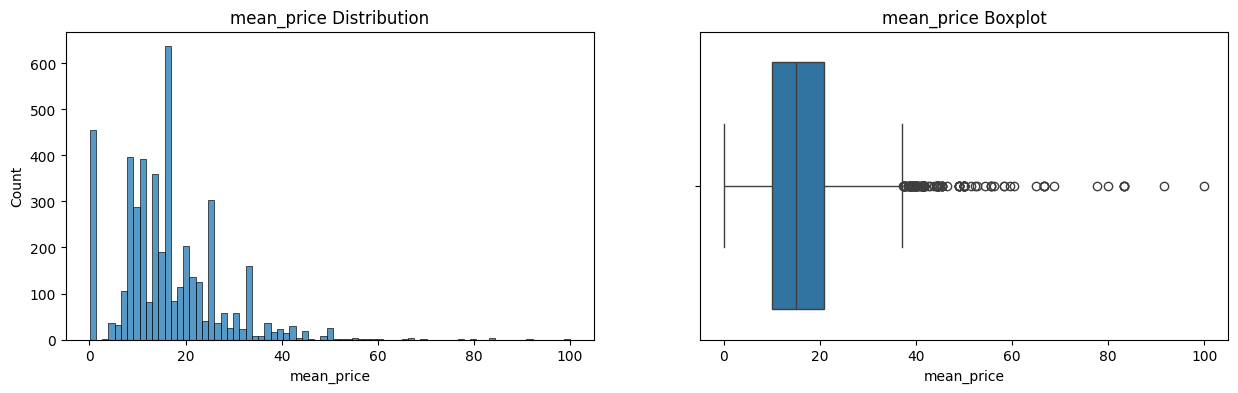

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=train, x='mean_price', ax=axes[0]);
histplot.set_title('mean_price Distribution');
boxplot = sns.boxplot(data=train, x='mean_price', ax=axes[1]);
boxplot.set_title('mean_price Boxplot');

Видим наличие выбросов.
Отчистим датасет от них по методу 3 сигм

Число выбросов: 23
Результирующее число записей: 4525


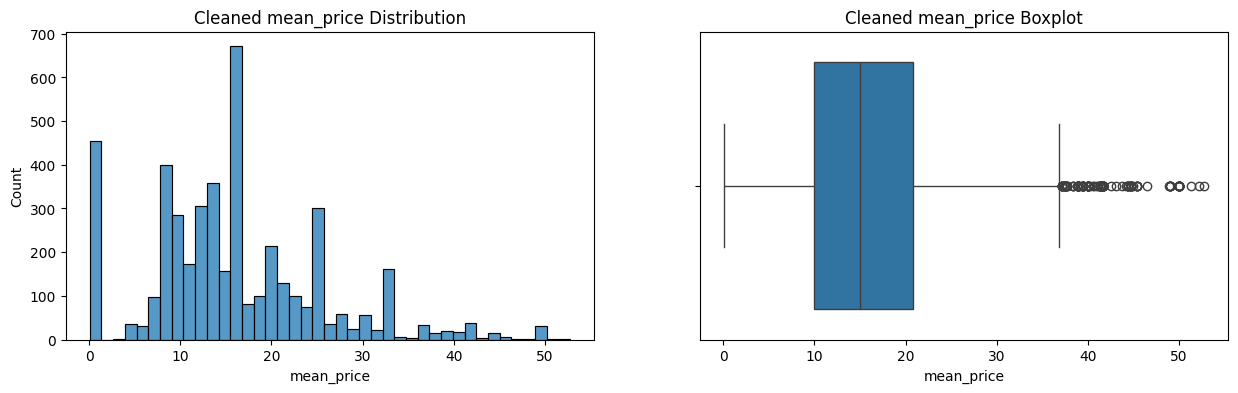

In [35]:
def outliers_iqr_mod(data, feature, left = 3, right = 3):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


outliers, cleaned = outliers_iqr_mod(train, 'mean_price')

print(f'Число выбросов: {len(outliers)}')
print(f'Результирующее число записей: {len(cleaned)}')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='mean_price', ax=axes[0]);
histplot.set_title('Cleaned mean_price Distribution');
boxplot = sns.boxplot(data=cleaned, x='mean_price', ax=axes[1]);
boxplot.set_title('Cleaned mean_price Boxplot');

Все готово к обучению моделей.
Выделяем признаки и целевую переменную

In [36]:
X = cleaned.drop(columns=['mean_price'])
Y = cleaned['mean_price']

Разбиваем датасет на тестовый и тренировочный

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=33)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (3167, 59), (3167,)
Test dataset size: (1358, 59), (1358,)


Обучается линейная регрессия и оцениваются метрики:

In [38]:
# Создаем модель линейной регрессии
lig_reg = LinearRegression()

lig_reg.fit(X_train, y_train)

y_pred = lig_reg.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 6.633971330455161
Mean Squared Error: 80.2510612278616
R2 score: 0.10578011019087463


In [39]:
# Создаем модель SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train, y_train)

# Предсказания
y_pred = svr_rbf.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 6.3779873488117715
Mean Squared Error: 81.43803217971208
R2 score: 0.09255395445498171


Тестируются различные гиперпараметры для SVR:

In [40]:
for i in range(0, 21):
    svr_range = SVR(kernel='rbf', C=(1+i*10), gamma=0.1, epsilon=0.1)
    svr_range.fit(X_train, y_train)
    y_pred_range = svr_range.predict(X_test)
    print(f'Score for C={1+i*10}: MSE={mean_squared_error(y_test, y_pred_range)}, R2={r2_score(y_test, y_pred_range)}')

Score for C=1: MSE=79.09342276071176, R2=0.11867942051394031
Score for C=11: MSE=77.29924011305819, R2=0.13867160236094134
Score for C=21: MSE=77.55523812599772, R2=0.13581907291871798
Score for C=31: MSE=77.87024445500734, R2=0.13230902681457546
Score for C=41: MSE=78.52913858104209, R2=0.12496711477299216
Score for C=51: MSE=79.09310323497947, R2=0.11868298091875928
Score for C=61: MSE=79.52833101202769, R2=0.113833333713112
Score for C=71: MSE=79.97753134739519, R2=0.10882799336933735
Score for C=81: MSE=80.51890769928727, R2=0.10279555598686274
Score for C=91: MSE=81.02814870549128, R2=0.0971211956795135
Score for C=101: MSE=81.47726736462744, R2=0.09211676543598513
Score for C=111: MSE=81.87771079459951, R2=0.08765471254415247
Score for C=121: MSE=82.21751476906844, R2=0.08386835174147667
Score for C=131: MSE=82.492191235428, R2=0.08080769240908747
Score for C=141: MSE=82.75293787583092, R2=0.0779022500575256
Score for C=151: MSE=82.93045227311163, R2=0.07592424624863914
Score for

In [41]:
for i in range(1, 21):
    svr_range = SVR(kernel='rbf', C=i, gamma=0.1, epsilon=0.1)
    svr_range.fit(X_train, y_train)
    y_pred_range = svr_range.predict(X_test)
    print(f'Score for C={i}: MSE={mean_squared_error(y_test, y_pred_range)}, R2={r2_score(y_test, y_pred_range)}')

Score for C=1: MSE=79.09342276071176, R2=0.11867942051394031
Score for C=2: MSE=78.62070359197442, R2=0.12394682603495555
Score for C=3: MSE=78.18126063088314, R2=0.1288434421074669
Score for C=4: MSE=77.8753471864077, R2=0.1322521682031037
Score for C=5: MSE=77.65826147181211, R2=0.13467110648023894
Score for C=6: MSE=77.5464472985894, R2=0.13591702717123655
Score for C=7: MSE=77.42789691973859, R2=0.13723800791704632
Score for C=8: MSE=77.3379439860403, R2=0.13824033363372812
Score for C=9: MSE=77.30462276238738, R2=0.13861162468567578
Score for C=10: MSE=77.28099602531658, R2=0.13887489221007676
Score for C=11: MSE=77.29924011305819, R2=0.13867160236094134
Score for C=12: MSE=77.29368147840998, R2=0.13873354100183355
Score for C=13: MSE=77.29593798821324, R2=0.13870839721037775
Score for C=14: MSE=77.32858070498857, R2=0.13834466661103983
Score for C=15: MSE=77.381143761752, R2=0.13775896805319066
Score for C=16: MSE=77.4738367183463, R2=0.13672611086521547
Score for C=17: MSE=77.52

In [42]:
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    svr_range = SVR(kernel=kernel, C=10, gamma=0.1, epsilon=0.1)
    svr_range.fit(X_train, y_train)
    y_pred_range = svr_range.predict(X_test)
    print(f'Score for rtrnel={kernel}: MSE={mean_squared_error(y_test, y_pred_range)}, R2={r2_score(y_test, y_pred_range)}')

Score for rtrnel=linear: MSE=80.350423157826, R2=0.10467294210232181
Score for rtrnel=poly: MSE=80.73852196647216, R2=0.10034844260545861
Score for rtrnel=rbf: MSE=77.28099602531658, R2=0.13887489221007676
Score for rtrnel=sigmoid: MSE=1167.1719020777164, R2=-12.005539287521444


In [43]:
for gamma in ['auto', 'scale']:
    svr_range = SVR(kernel='rbf', C=10, gamma=gamma, epsilon=0.1)
    svr_range.fit(X_train, y_train)
    y_pred_range = svr_range.predict(X_test)
    print(f'Score for gamma={gamma}: MSE={mean_squared_error(y_test, y_pred_range)}, R2={r2_score(y_test, y_pred_range)}')

for gamma in range(1,11):
    svr_range = SVR(kernel='rbf', C=10, gamma=gamma/10, epsilon=0.1)
    svr_range.fit(X_train, y_train)
    y_pred_range = svr_range.predict(X_test)
    print(f'Score for gamma={gamma/10}: MSE={mean_squared_error(y_test, y_pred_range)}, R2={r2_score(y_test, y_pred_range)}')

Score for gamma=auto: MSE=79.09776508967421, R2=0.1186310348992593
Score for gamma=scale: MSE=77.1246937413865, R2=0.14061653411454977
Score for gamma=0.1: MSE=77.28099602531658, R2=0.13887489221007676
Score for gamma=0.2: MSE=76.387696320839, R2=0.14882873395475305
Score for gamma=0.3: MSE=75.45249747066676, R2=0.1592494486463154
Score for gamma=0.4: MSE=75.23650310886691, R2=0.16165622621975628
Score for gamma=0.5: MSE=75.49167672095797, R2=0.1588128828945089
Score for gamma=0.6: MSE=75.89225489772632, R2=0.15434932854882044
Score for gamma=0.7: MSE=76.10495985729166, R2=0.15197920405957144
Score for gamma=0.8: MSE=76.30492100599302, R2=0.1497510810463425
Score for gamma=0.9: MSE=76.38793704605403, R2=0.14882605160673212
Score for gamma=1.0: MSE=76.48853379060674, R2=0.14770512425134608


In [44]:
for epsilon in range(1,21):
    svr_range = SVR(kernel='rbf', C=10, gamma=0.4, epsilon=epsilon/10)
    svr_range.fit(X_train, y_train)
    y_pred_range = svr_range.predict(X_test)
    print(f'Score for epsilon={epsilon/10}: MSE={mean_squared_error(y_test, y_pred_range)}, R2={r2_score(y_test, y_pred_range)}')

Score for epsilon=0.1: MSE=75.23650310886691, R2=0.16165622621975628
Score for epsilon=0.2: MSE=75.2045133213382, R2=0.16201268137238933
Score for epsilon=0.3: MSE=75.22192805891936, R2=0.16181863278932251
Score for epsilon=0.4: MSE=75.21814090527613, R2=0.16186083220776903
Score for epsilon=0.5: MSE=75.25844088845908, R2=0.16141177837633336
Score for epsilon=0.6: MSE=75.27916341996354, R2=0.16118087177453921
Score for epsilon=0.7: MSE=75.25777014277031, R2=0.16141925234772647
Score for epsilon=0.8: MSE=75.3032698857723, R2=0.16091225873853232
Score for epsilon=0.9: MSE=75.37720590957801, R2=0.16008840591903195
Score for epsilon=1.0: MSE=75.42050910945169, R2=0.15960588790584984
Score for epsilon=1.1: MSE=75.47154963517242, R2=0.1590371545758792
Score for epsilon=1.2: MSE=75.53068453184255, R2=0.15837822745422925
Score for epsilon=1.3: MSE=75.57380532077443, R2=0.1578977420059725
Score for epsilon=1.4: MSE=75.57989482203881, R2=0.1578298880353669
Score for epsilon=1.5: MSE=75.608390873

Лучшая модель SVR используется для предсказания на тестовой выборке, и результаты сохраняются в CSV-файл:

In [45]:
reg = SVR(kernel='rbf', C=10, gamma=0.4, epsilon=0.2)
reg.fit(X, Y)
y_pred = reg.predict(test)

submition = pd.DataFrame(y_pred, columns=['mean_price'])
submition = submition.reset_index()
submition.to_csv('my_submit_v11.csv', index=False)

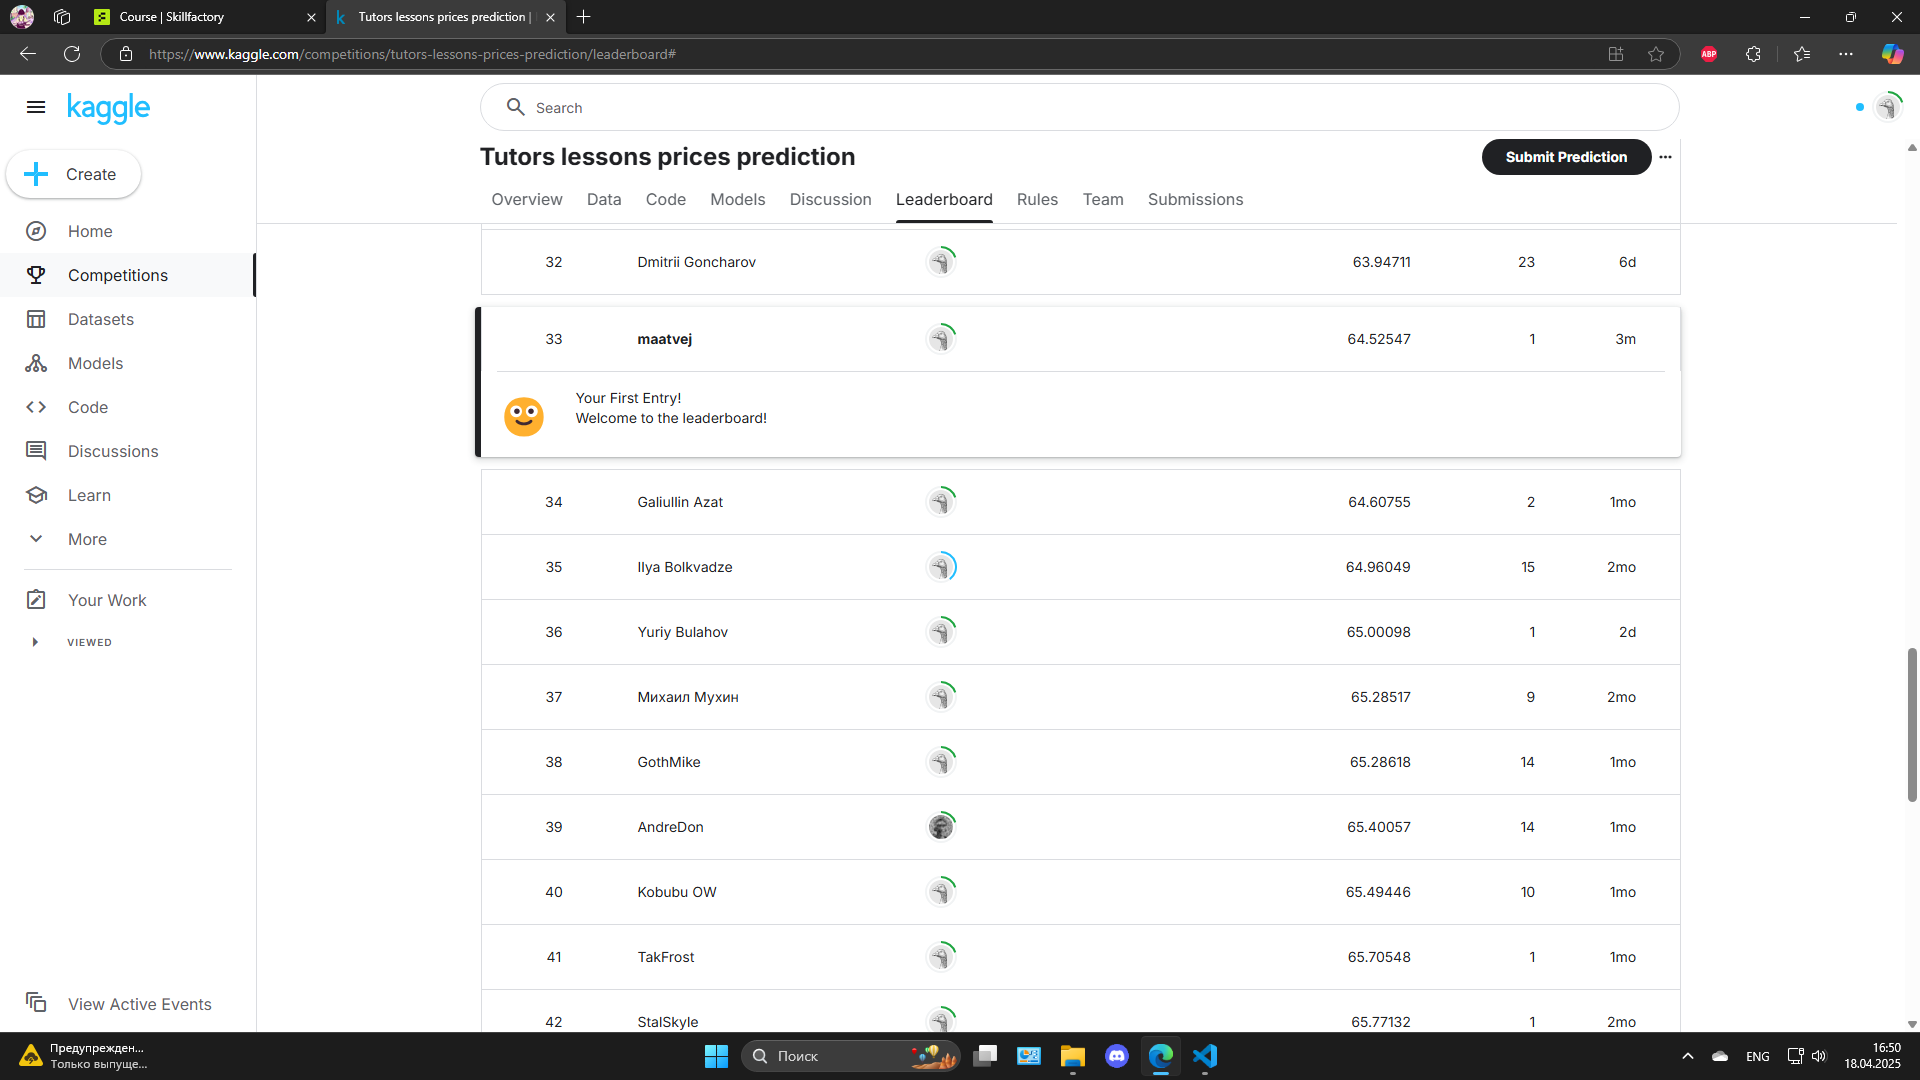